<a href="https://colab.research.google.com/github/MathiasAlejandr0/prueba_ML/blob/main/prueba_ml_mathias_jara.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome           

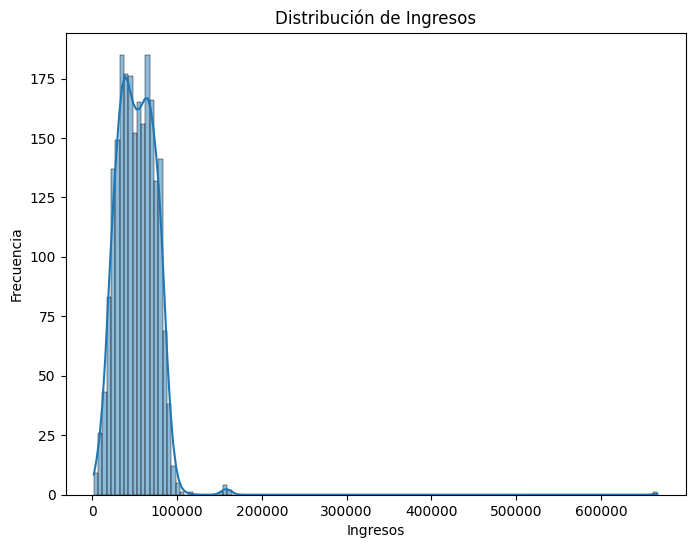

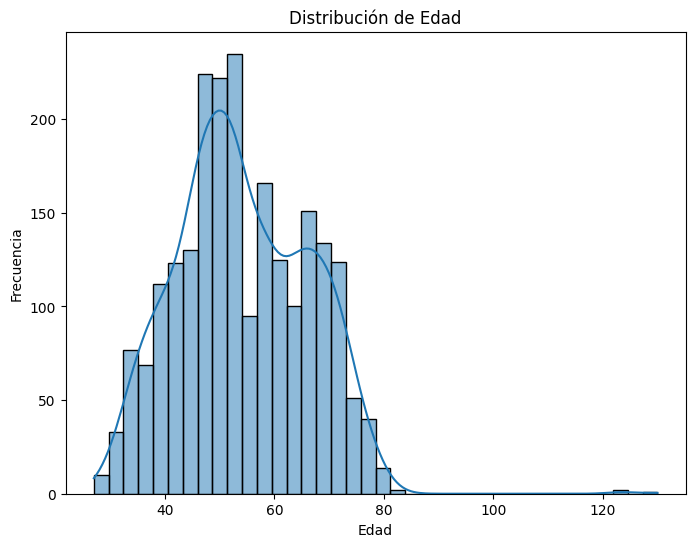

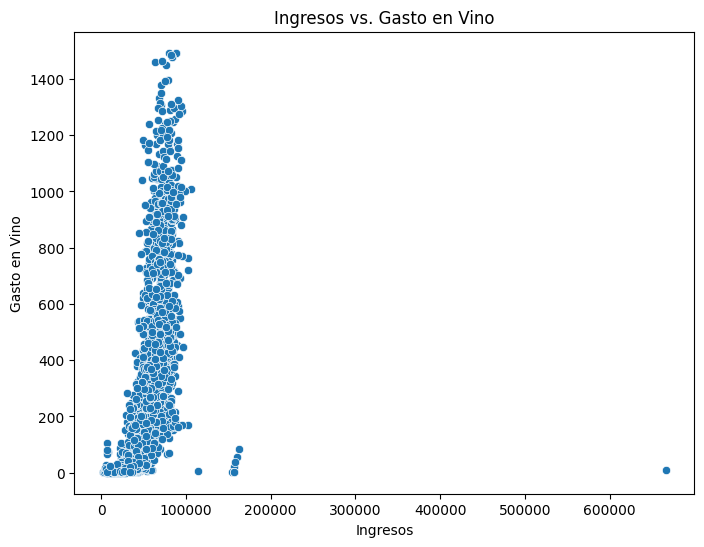

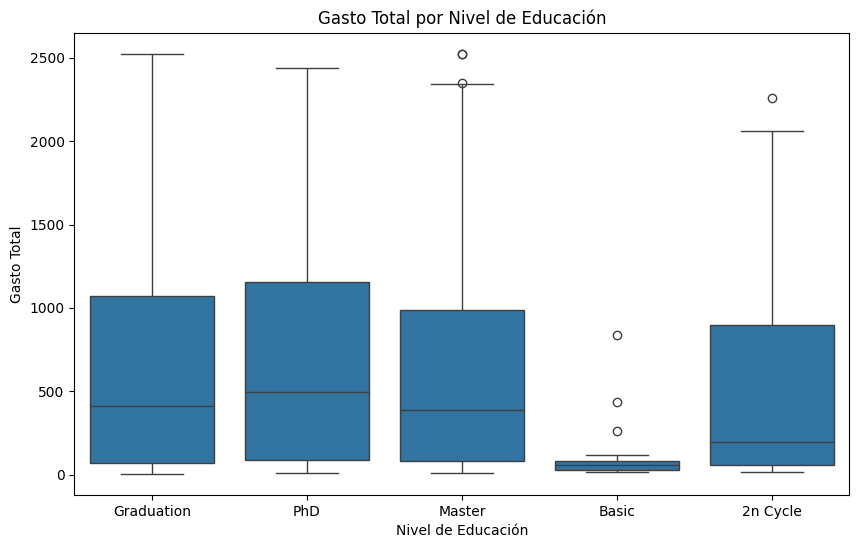

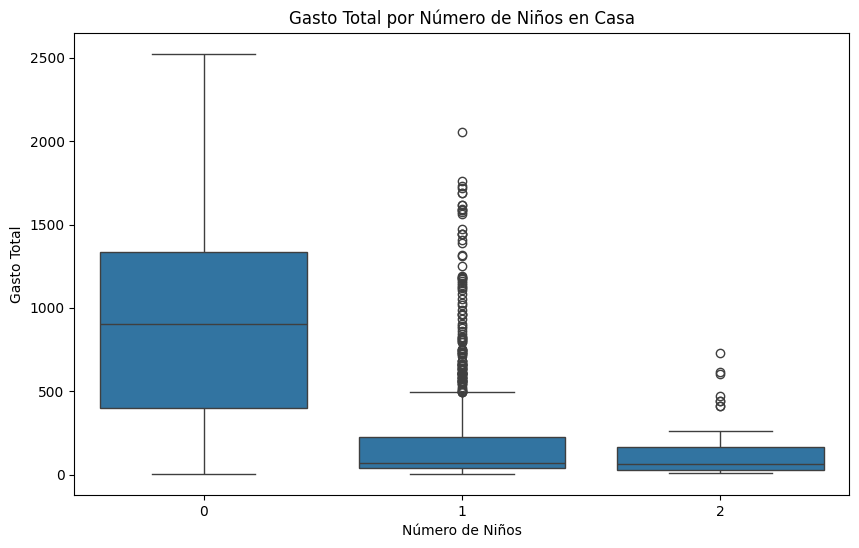

<Figure size 1000x600 with 0 Axes>

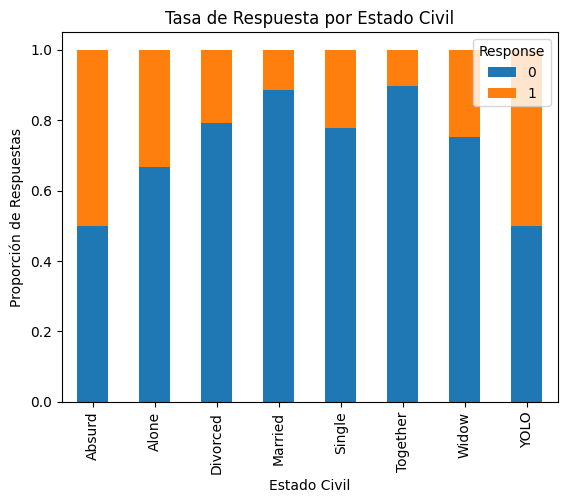

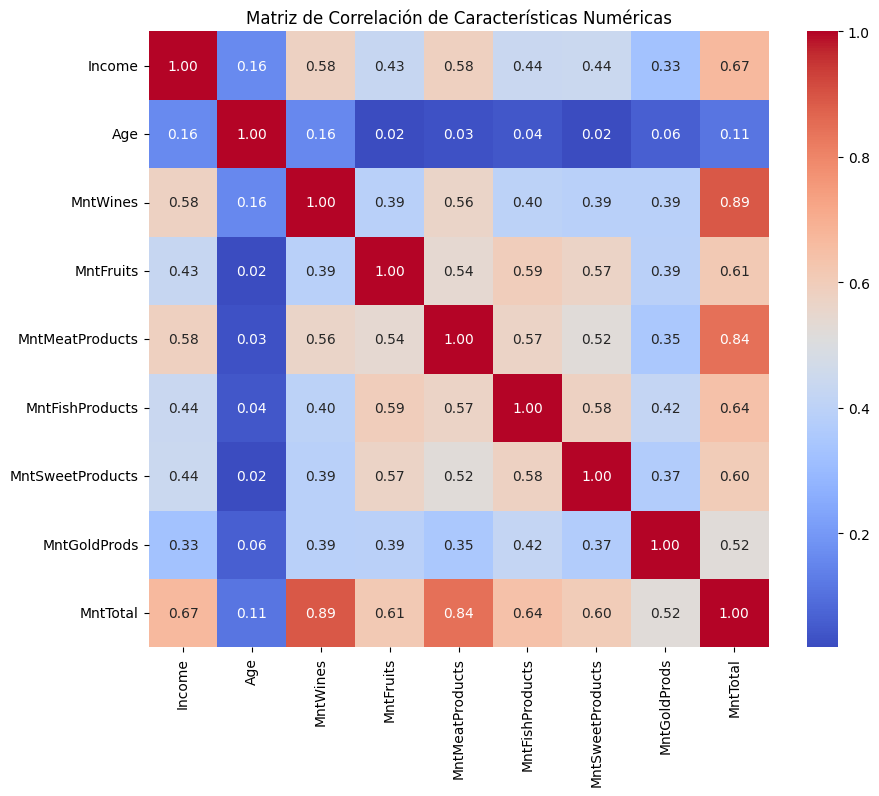

In [9]:
import numpy as np # para calculos numericos
import matplotlib.pyplot as plt #para generar graficos
import seaborn as sns #para generar graficos igual
import pandas as pd #para majo de datos en forma de tablas
import matplotlib as mpl #para perzonalizar graficos


mpl.rcParams['font.family'] = 'sans-serif'  # Usa una fuente sans-serif que soporte caracteres en español
mpl.rcParams['font.sans-serif'] = ['DejaVu Sans'] # Una fuente sans-serif común que funciona bien

# Cargar el conjunto de datos
try:
    # Usar delimiter='\t' para leer correctamente archivos separados por tabulaciones.
    df = pd.read_csv('marketing_campaign.csv', delimiter='\t')
except FileNotFoundError:
    print("Error: 'marketing_campaign.csv' no encontrado. Asegúrate de que el archivo esté en el directorio actual o proporciona la ruta correcta.")
    exit() # Salir del script si no se encuentra el archivo

# Imprimir los nombres de las columnas para verificar si 'Age' existe.
print(df.columns)

# Calcular MntTotal (Gasto Total)
df['MntTotal'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + \
                 df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

# Tipos de datos y estadísticas descriptivas
print(df.info())
print(df.describe())

# Tablas de frecuencia para variables categóricas
print(df['Education'].value_counts())
print(df['Marital_Status'].value_counts())
print(df['Response'].value_counts())

# Visualizaciones

# Distribución de ingresos
plt.figure(figsize=(8, 6))
sns.histplot(df['Income'], kde=True)
plt.title('Distribución de Ingresos')
plt.xlabel('Ingresos')
plt.ylabel('Frecuencia')
plt.show()

# Distribución de edad
plt.figure(figsize=(8, 6))
if 'Year_Birth' in df.columns:
    df['Age'] = 2023 - df['Year_Birth']
    sns.histplot(df['Age'], kde=True)
    plt.title('Distribución de Edad')
    plt.xlabel('Edad')
    plt.ylabel('Frecuencia')
    plt.show()
else:
    print("La columna 'Age' o 'Year_Birth' no se encuentra en el DataFrame.")

# Gráfico de dispersión de ingresos vs. gasto
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Income', y='MntWines', data=df)
plt.title('Ingresos vs. Gasto en Vino')
plt.xlabel('Ingresos')
plt.ylabel('Gasto en Vino')
plt.show()

# Diagrama de caja de gasto por nivel de educación
plt.figure(figsize=(10,6))
sns.boxplot(x='Education', y='MntTotal', data=df)
plt.title('Gasto Total por Nivel de Educación')
plt.xlabel('Nivel de Educación')
plt.ylabel('Gasto Total')
plt.show()

# Relación entre el número de niños y el gasto
plt.figure(figsize=(10, 6))
sns.boxplot(x='Kidhome', y='MntTotal', data=df)
plt.title('Gasto Total por Número de Niños en Casa')
plt.xlabel('Número de Niños')
plt.ylabel('Gasto Total')
plt.show()

# Tasa de respuesta por estado civil
plt.figure(figsize=(10,6))
marital_response = df.groupby('Marital_Status')['Response'].value_counts(normalize=True).unstack()
marital_response.plot(kind='bar', stacked=True)
plt.title("Tasa de Respuesta por Estado Civil")
plt.xlabel("Estado Civil") # Agregar etiqueta al eje x
plt.ylabel("Proporción de Respuestas") # Agregar etiqueta al eje y
plt.show()

# Matriz de correlación para características numéricas
numerical_features = ['Income', 'Age', 'MntWines', 'MntFruits', 'MntMeatProducts',
                      'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'MntTotal']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación de Características Numéricas')
plt.show()


#Explicación de cada gráfico generado en el código:

# 1. Distribución de Ingresos:
#   -Histograma que muestra la distribución de los ingresos de los clientes.
#   -Permite observar la concentración de ingresos y la forma de la distribución esta puede se normal, sesgada,etc
#   -Estos histogramas muestran la frecuencia de cada nivel de ingreso y edad.
#    La forma de la distribución (simétrica, sesgada a la izquierda o derecha)
#    y su centralidad (media, mediana, moda) nos indican la tendencia de los datos.
#    Por ejemplo, una distribución sesgada a la derecha para los ingresos significaría
#    que hay muchos clientes con ingresos bajos o medios, pero unos pocos con ingresos muy altos.
#    La dispersión de los datos (rango, desviación estándar) muestra la variabilidad de ingresos y edades.
#    Estos gráficos no muestran correlaciones directamente, solo distribuciones individuales.


# 2. Ingresos vs. Gasto en Vino:
#  - Diagrama de dispersión que muestra la relación entre los ingresos de los clientes y la cantidad gastada en vinos.
#  - Permite observar si existe alguna correlación entre estas dos variables. Por ejemplo, si los clientes con mayores ingresos tienden a gastar más en vino.
#  - Este diagrama de dispersión muestra la relación entre el ingreso y el gasto en vino.  Buscamos patrones visuales:
#    La fuerza de la correlación se puede visualizar por la dispersión de los puntos.
#    Una nube de puntos muy compacta indica una correlación fuerte, mientras que una nube dispersa indica una correlación débil o nula.  Este gráfico no proporciona una medida numérica de la correlación, solo una indicación visual.
# 3. Gasto Total por Nivel de Educación:
#  - Diagrama de caja que muestra la distribución del gasto total para cada nivel de educación.
#  - Permite comparar la distribución del gasto entre los diferentes niveles de educación. La caja representa el rango intercuartil (IQR), los bigotes muestran el rango de los datos sin outliers y los puntos aislados representan los outliers.

# 4. Gasto Total por Número de Niños en Casa:
#  - Diagrama de caja que muestra la distribución del gasto total en función del número de niños en casa.
#  - Permite analizar si el número de niños en el hogar afecta al gasto total.
#  - Los diagramas de caja muestran la distribución del gasto total para diferentes niveles de educación y número de niños.
#    Las cajas representan el rango intercuartil , que contiene el 50% de los datos.
#    La línea dentro de la caja es la mediana y los puntos que estan por fuera y separados son valores atípicos.

# 5. Tasa de Respuesta por Estado Civil:
#  - Gráfico de barras apiladas que muestra la tasa de respuesta de la campaña de marketing para cada estado civil.
#  - Permite ver cómo las respuestas a la campaña varían según el estado civil.
#  - Este gráfico muestra la proporción de respuestas positivas y negativas a la campaña de marketing, segmentadas por estado civil.
#    Permite identificar si hay alguna diferencia en la tasa de respuesta entre los diferentes estados civiles.
#    Observando las proporciones, se puede determinar si un estado civil tiene una mayor probabilidad de responder positivamente
#    a la campaña que otro.  No se puede ver la correlación lineal, pero si existe relación entre dos variables categóricas.

# 6. Matriz de Correlación de Características Numéricas:
#  - Mapa de calor que muestra la matriz de correlación entre las características numéricas (ingresos, edad, gasto en diferentes productos, etc.).
#  - Permite identificar relaciones lineales entre las variables. Los valores cercanos a 1 indican una alta correlación positiva, los valores cercanos a -1 indican una alta correlación negativa, y los valores cercanos a 0 indican poca o ninguna correlación.

#En general, los gráficos proporcionan información sobre la distribución de variables clave, las relaciones entre variables, y el impacto de variables categóricas en las variables numéricas, lo que puede ser útil para análisis de mercado y estrategias de marketing.






